# Predicting NBA Player Salary

## Data Wrangling

In [16]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("nba_salaries_1990_to_2018.csv")

In [3]:
df.head(10)

,player,salary,season_end,season_start,team,team_name
0,Moses Malone,2406000,1991,1990,ATL,Atlanta Hawks
1,Dominique Wilkins,2065000,1991,1990,ATL,Atlanta Hawks
2,Jon Koncak,1550000,1991,1990,ATL,Atlanta Hawks
3,Doc Rivers,895000,1991,1990,ATL,Atlanta Hawks
4,Rumeal Robinson,800000,1991,1990,ATL,Atlanta Hawks
5,Tim McCormick,775000,1991,1990,ATL,Atlanta Hawks
6,Kevin Willis,685000,1991,1990,ATL,Atlanta Hawks
7,Alexander Volkov,650000,1991,1990,ATL,Atlanta Hawks
8,John Battle,590000,1991,1990,ATL,Atlanta Hawks
9,Sidney Moncrief,510000,1991,1990,ATL,Atlanta Hawks


In [4]:
df[df.player == "Kobe Bryant"].head(5)

,player,salary,season_end,season_start,team,team_name
4749,Kobe Bryant,1015000,1997,1996,LAL,Los Angeles Lakers
4762,Kobe Bryant,1167240,1998,1997,LAL,Los Angeles Lakers
4777,Kobe Bryant,1319000,1999,1998,LAL,Los Angeles Lakers
4786,Kobe Bryant,9000000,2000,1999,LAL,Los Angeles Lakers
4804,Kobe Bryant,10130000,2001,2000,LAL,Los Angeles Lakers


In [5]:
df2 = pd.read_csv("Seasons_Stats.csv")
df2[df2.Player == "Kobe Bryant"].head(5)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
12900,12900,1997.0,Kobe Bryant,SG,18.0,LAL,71.0,6.0,1103.0,14.4,...,0.819,47.0,85.0,132.0,91.0,49.0,23.0,112.0,102.0,539.0
13479,13479,1998.0,Kobe Bryant,SG,19.0,LAL,79.0,1.0,2056.0,18.5,...,0.794,79.0,163.0,242.0,199.0,74.0,40.0,157.0,180.0,1220.0
14021,14021,1999.0,Kobe Bryant,SG,20.0,LAL,50.0,50.0,1896.0,18.9,...,0.839,53.0,211.0,264.0,190.0,72.0,50.0,157.0,153.0,996.0
14537,14537,2000.0,Kobe Bryant,SG,21.0,LAL,66.0,62.0,2524.0,21.7,...,0.821,108.0,308.0,416.0,323.0,106.0,62.0,182.0,220.0,1485.0
15028,15028,2001.0,Kobe Bryant,SG,22.0,LAL,68.0,68.0,2783.0,24.5,...,0.853,104.0,295.0,399.0,338.0,114.0,43.0,220.0,222.0,1938.0


In [6]:
df3 = df.merge(df2, how="inner", left_on=["player", "season_end"], right_on=["Player", "Year"])

Drop duplicate or junk columns

In [7]:
df3 = df3.drop(labels=["Unnamed: 0","Year", "Player", "Tm"], axis=1)

Drop columns that aren't defined

In [8]:
df3 = df3.drop(labels=["blanl","blank2","OBPM","DBPM"], axis=1)

In [9]:
df3.describe()

,salary,season_start,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,1.273000e+04,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12725.000000,12675.000000,12672.000000,12672.000000,...,12212.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000,12730.000000
mean,3.165721e+06,2004.277376,26.925687,48.489317,22.564808,1118.857738,12.296676,0.503618,0.200662,0.305659,...,0.720380,54.509269,138.180833,192.690102,101.745090,36.211548,22.031422,65.626709,101.225059,450.237942
std,3.951918e+06,7.802715,4.102578,26.113582,27.726455,895.372770,5.840276,0.093662,0.200509,0.231612,...,0.149916,60.852620,133.871680,188.875048,127.266168,34.683466,31.660565,60.728181,75.607611,442.167976
min,2.853000e+03,1990.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000e+05,1998.000000,24.000000,25.000000,0.000000,307.250000,9.600000,0.472000,0.009000,0.185000,...,0.654000,11.000000,33.000000,46.000000,16.000000,8.000000,3.000000,16.000000,34.000000,91.250000
50%,1.600500e+06,2005.000000,26.000000,52.000000,8.000000,935.000000,12.600000,0.515000,0.157000,0.273000,...,0.749000,32.000000,101.000000,137.000000,56.000000,27.000000,11.000000,49.000000,92.000000,311.000000
75%,4.000000e+06,2011.000000,30.000000,73.000000,41.000000,1799.750000,15.400000,0.550000,0.351000,0.379000,...,0.815000,77.000000,202.000000,280.000000,137.750000,54.000000,27.000000,99.000000,157.000000,691.000000
max,3.096345e+07,2016.000000,42.000000,85.000000,83.000000,3533.000000,88.300000,1.094000,1.000000,6.000000,...,1.000000,443.000000,894.000000,1258.000000,935.000000,246.000000,307.000000,464.000000,371.000000,2832.000000


Let's see which columns have null values.

In [10]:
df3.columns[df3.isnull().any()]

Index(['PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'WS/48', 'FG%', '3P%', '2P%', 'eFG%', 'FT%'],
      dtype='object')

* **PER** or Player Efficiency Rating has only 5 missing values so we could just drop those rows
* **TS%** or True Shooting percentage is not needed because we have field goal percentage so we can drop those as well
* **3PAr** or 3 Point Attempt Rate is not needed because we have 3 Points Attempted
* **FTr** or Free Throw Rate is not needed because we have Free Throws Attempted
* **ORB%, DRB%, TRB%, AST%, STL%, BLK%, TOV%** are the stat percentages and are not needed because we have the raw number of them so those columns can be dropped
* **USG%** or Usage Percentage has only 5 missing values so those rows can be dropped
* **WS/48** or Win Shares Per 48 minutes is not needed because we have Win Shares so that column can be dropped
* **FG%, 3P%, 2P%, and FT%** can be recalculated from their respected made and attempted values
* **eFG%** or Effective Field Goal Percentage is not needed because we have Field Goal Percentage so that column can be dropped

Drop rows where the column has only a few missing values

In [11]:
df3.dropna(subset=["PER","USG%"], inplace=True)

Drop columns that we do not need.

In [12]:
df3.drop(labels=["TS%","3PAr","FTr","ORB%","DRB%","TRB%","AST%","STL%","BLK%","TOV%","WS/48","eFG%","season_start"], axis=1, inplace=True)

Fill NAs by using our other data

In [13]:
df3["FG%"] = df3["FG"]/df3["FGA"]
df3["3P%"] = df3["3P"]/df3["3PA"]
df3["2P%"] = df3["2P"]/df3["2PA"]
df3["FT%"] = df3["FT"]/df3["FTA"]
# All other NaN should be 0 in the case of 0 attempted shots
df3.fillna(0, inplace=True)

In [14]:
df3.describe()

,salary,season_end,Age,G,GS,MP,PER,USG%,OWS,DWS,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,1.272500e+04,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,...,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000
mean,3.166943e+06,2005.276071,26.926523,48.507898,22.573674,1119.297367,12.296676,18.626491,1.136141,1.100699,...,0.691334,54.530688,138.235049,192.765737,101.785069,36.225776,22.040079,65.652495,101.264676,450.414853
std,3.952213e+06,7.803793,4.103160,26.101877,27.728293,895.273876,5.840276,5.266488,1.887761,1.130854,...,0.204079,60.854979,133.870030,188.873599,127.275184,34.682850,31.663772,60.726173,75.596037,442.164740
min,2.853000e+03,1991.000000,18.000000,1.000000,0.000000,1.000000,-90.600000,0.000000,-3.300000,-0.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000e+05,1999.000000,24.000000,25.000000,0.000000,308.000000,9.600000,15.200000,0.000000,0.200000,...,0.636364,11.000000,33.000000,46.000000,16.000000,8.000000,3.000000,17.000000,34.000000,92.000000
50%,1.602000e+06,2006.000000,26.000000,52.000000,8.000000,935.000000,12.600000,18.400000,0.400000,0.700000,...,0.740634,32.000000,101.000000,137.000000,56.000000,27.000000,11.000000,49.000000,92.000000,311.000000
75%,4.000000e+06,2012.000000,30.000000,73.000000,41.000000,1800.000000,15.400000,21.800000,1.800000,1.600000,...,0.812000,77.000000,202.000000,281.000000,138.000000,54.000000,27.000000,99.000000,157.000000,691.000000
max,3.096345e+07,2017.000000,42.000000,85.000000,83.000000,3533.000000,88.300000,88.300000,14.800000,9.100000,...,1.000000,443.000000,894.000000,1258.000000,935.000000,246.000000,307.000000,464.000000,371.000000,2832.000000


## Data Visualization

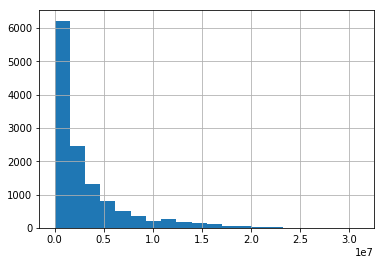

In [19]:
df3["salary"].hist(bins=20)

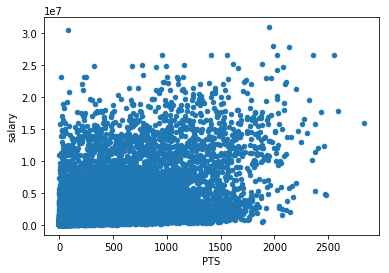

In [21]:
df3.plot(x="PTS",y="salary", kind="scatter")

In [23]:
df3.to_csv("nba_stats_and_salary.csv")